## NAG algorithm using SGD

In [1]:
import pandas as pd

In [2]:
l1=[0.2,0.4,0.6,0.8]
l2=[3.4,3.8,4.2,4.8]
d={'x':l1,'y':l2}
data=pd.DataFrame(d)

In [3]:
data

,x,y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.8


In [4]:
m=1
c=-1
l=0.1
r=0.9
vm=0
vc=0
e_list=[]

In [5]:
def y_value(m,c,x):
    return m*x+c

In [6]:
def error(y_actual,y_predicted):
    return 0.5*(y_actual-y_predicted)**2

In [7]:
def gradient(m,c,y_actual,x,vm,vc):
    g_m=(y_actual-(m+r*vm)*x-c-r*vc)*(-1)*x
    g_c=(y_actual-(m+r*vm)*x-c-r*vc)*(-1)
    vm=r*vm-l*g_m
    vc=r*vc-l*g_c
    m=m+vm
    c=c+vc
    return m,c,vm,vc

In [8]:
for i in range(20):
    for sample in range(len(data)):
        y_predicted=y_value(m,c,data['x'][sample])
        y_actual=data['y'][sample]
        e=error(y_actual,y_predicted)
        m,c,vm,vc=gradient(m,c,y_actual,data['x'][sample],vm,vc)
        e_list.append(e)

In [9]:
e_list

[8.82,
 7.7870364799999985,
 5.338304787833294,
 2.9368140174869453,
 0.47485106306727576,
 0.001321174733630979,
 0.5002687558237724,
 1.1477993744794193,
 0.9174339154239062,
 1.1764960509246791,
 1.1354350705126803,
 0.5673027764376493,
 0.162318851343808,
 0.03621108025000237,
 0.0017398553877342432,
 0.15598580226460748,
 0.07621451216521498,
 0.1132015619701784,
 0.12772422911544434,
 0.2229277690636504,
 0.022774181414067018,
 0.0050037247855560674,
 0.00017301237779351525,
 0.0029512469698840717,
 0.01815435035325832,
 0.030159396170944545,
 0.03644086955053511,
 0.0015776446670529502,
 0.0169587010199973,
 0.011941935477968322,
 0.006128931454687931,
 0.010104210629668493,
 0.00019619655007172264,
 9.329789982864253e-06,
 2.499658084620816e-05,
 0.022699043846016377,
 0.00014050257500165654,
 5.100834145495569e-05,
 0.0007616854003165769,
 0.009189751583924786,
 0.00031142537551016023,
 0.0019325008461192898,
 0.004518786224291464,
 0.003445730381967624,
 0.0004439576131562645

Text(0.5, 0, 'steps')

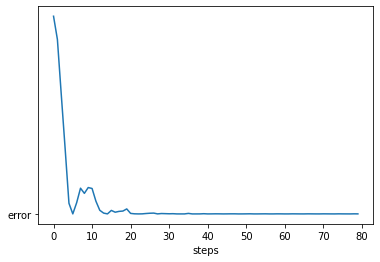

In [10]:
import matplotlib.pyplot as plt
plt.plot(e_list)
plt.plot("error")
plt.xlabel("steps")

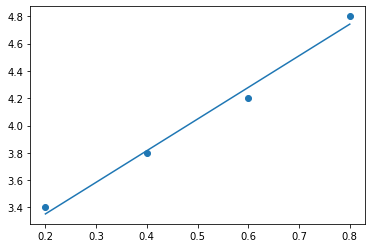

In [11]:
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],m*data['x']+c)